# Theoretical Questions

* This is the theoretical part of the final project. It includes theoretical questions from various topics covered in the course.
* There are 7 questions among which you need to choose 6, according to the following key:
    + Question 1 is **mandatory**.
    + Choose **one question** from questions 2-3.
    + Question 4 is **mandatory**.
    + Questions 5-6 are **mandatory**.
    + Question 7 is **mandatory**.
* Question 1 is worth 15 points, whereas the other questions worth 7 points.
* All in all, the maximal grade for this parts is 15+7*5=50 points.
* **You should answer the questions on your own. We will check for plagiarism.**
* If you need to add external images (such as graphs) to this notebook, please put them inside the 'imgs' folder. DO NOT put a reference to an external link.
* Good luck!

## Part 1: General understanding of the course material

### Question 1

1.  Relate the number of parameters in a neural network to the over-fitting phenomenon (*).
    Relate this to the design of convolutional neural networks, and explain why CNNs are a plausible choice for an hypothesis class for visual classification tasks.

    (*) In the context of classical under-fitting/over-fitting in machine learning models.

(A) Convolutional Neural Networks (CNNs) are a plausible choice for a hypothesis class (model architecture) for visual classification tasks due to several reasons:
Parameter Sharing: In traditional fully connected networks, every parameter connects to every input neuron, resulting in a massive number of parameters. In contrast, CNNs employ parameter sharing by using the same filters across different spatial locations. This significantly reduces the number of parameters and prevents overfitting. This is a relevant explanation not only for visual tasks.
Local Receptive Fields: CNNs mimic the way humans perceive images. They use small local receptive fields (filters/kernels) to capture spatial hierarchies in the data. These filters focus on local patterns, allowing the network to learn important features while ignoring irrelevant variations. Therefore, the size of kernels can be small relative to the size of the images. In visual classification tasks this means that we don’t need the neural network to hold the exact description of a feature but rather a schematic structure, like a heatmap that is not very specific to each sample.
Translation Invariance: CNNs are inherently translation invariant. The same filter can detect a feature regardless of its position in the image, which helps in capturing the essence of the feature without being overly sensitive to its exact location. Therefore, again, there is no need to memorize locations and thus we avoid much more parameters that describe localizing.
Hierarchical Feature Learning: CNNs are designed with multiple layers, each learning increasingly complex features from the previous layer's output. This hierarchy enables the network to learn representations that become progressively more abstract and high-level, making them suitable for capturing intricate patterns in images. We need more parameters to the hierarchy, but the number of parameters is linearly dependent on the deepness of the net, so the multiplication factor is not as high as it was if we were considering fully connected networks. 
Pooling Layers: CNNs often incorporate pooling layers, which downsample feature maps and retain the most salient information. This further reduces the risk of overfitting by keeping only the most important features and lowering the number of parameters in other layers.
Regularization Techniques: Techniques like dropout and weight decay can be applied to CNNs to prevent overfitting. These methods encourage the network to rely on a broader range of features and prevent it from relying too heavily on specific patterns. Again, in dropout or decaying we engage less parameters to update, but this is might not reduce the complexity of all (we usually use a dropout of less than half of the neurons). 


(B) The number of parameters in a neural network is closely related to the overfitting phenomenon in machine learning. Overfitting occurs when a model learns to perform exceptionally well on the training data but fails to generalize effectively to unseen data, which is its ultimate purpose. Neural networks with many parameters have the capacity to memorize the training data to an excessive extent, capturing and learning noise and irrelevant patterns present in the data. As a result, such networks become overly complex and lose the ability to generalize well. To understand this in more detail, consider that a neural network with a substantial number of parameters has the potential to fit even the smallest details in the training data. However, these small details might not represent true underlying patterns but rather random fluctuations or noise. When the network becomes too focused on these noise patterns, it hampers its ability to generalize to new, unseen data points.


2. Consider the linear classifier model with hand-crafted features: 
    $$f_{w,b}(x) = w^T \psi(x) + b$$
    where $x \in \mathbb{R}^2$, $\psi$ is a non-learnable feature extractor and assume that the classification is done by $sign(f_{w,b}(x))$. Let $\psi$ be the following feature extractor $\psi(x)=x^TQx$ where $Q \in \mathbb{R}^{2 \times 2}$ is a non-learnable positive definite matrix. Describe a distribution of the data which the model is able to approximate, but the simple linear model fails to approximate (hint: first, try to describe the decision boundary of the above classifier).

![](imgs/Screenshot%202023-09-07%20120731.png)

3. Assume that we would like to train a Neural Network for classifying images into $C$ classes. Assume that the architecture can be stored in the memory as a computational graph with $N$ nodes where the output is the logits (namely, before applying softmax) for the current batch ($f_w: B \times Ch \times H \times W \rightarrow B \times C$). Assume that the computational graph operates on *tensor* values.
    * Implement the CE loss assuming that the labels $y$ are hard labels given in a LongTensor of shape $B \times 1$. **Use Torch's log_softmax and gather functions** and implement with less as possible operations.

In [1]:
# https://discuss.pytorch.org/t/cross-entropy-loss-math-under-the-hood/79749/3
from torch.nn.functional import log_softmax
from torch import gather
# Input:  model, x, y. 
# Output: the loss on the current batch.
n_labels = 4
n_samples = 5
import torch
y = torch.randint(0, n_labels, (n_samples, n_labels))
model = lambda: torch.randn(n_samples, n_labels, requires_grad=True)

logits = model()
log_probs = log_softmax(logits, dim=1)
log_probs_for_true_labels = gather(log_probs, 1, y)
loss = -log_probs_for_true_labels.sum()

print(y)
print(logits)
print(loss)

tensor([[1, 0, 1, 1],
        [1, 0, 0, 1],
        [1, 2, 3, 2],
        [1, 0, 2, 1],
        [0, 0, 1, 3]])
tensor([[-0.7936,  0.1479,  0.3303, -0.3885],
        [-1.1315, -0.3070,  0.3845,  1.6460],
        [ 1.1088, -0.9868, -0.1583, -0.5841],
        [ 0.4393, -1.1159, -1.1829,  0.6880],
        [ 0.1386, -2.8611, -0.8726,  0.8847]], requires_grad=True)
tensor(40.7682, grad_fn=<NegBackward0>)


* Using the model's function as a black box, draw the computational graph (treating both log_softmax and gather as an atomic operations). How many nodes are there in the computational graph?

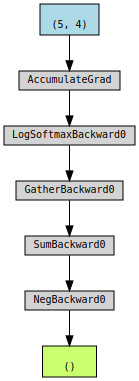

In [2]:
from graphviz import Digraph
from torchviz import make_dot

make_dot(loss) # There are 5 nodes in the graph.

In this case, the computational graph consists of three main nodes:

Input Node (x): This represents the input data (x) that is fed into the neural network model.

Neural Network Model Node (model): This node represents the neural network model, which takes the input data and produces the logits as its output.

Loss Node (loss): This node represents the computation of the Cross-Entropy loss, which takes the logits from the model and the true labels (y) to compute the loss.

Here is a simplified representation of the computational graph:

Input Node (x) --> Neural Network Model Node (model) --> Logits --> Loss Node (loss)

So, there are a total of three nodes in this computational graph: the input node, the model node, and the loss node.

* Now, instead of using hard labels, assume that the labels are representing some probability distribution over the $C$ classes. How would the gradient computation be affected? analyze the growth in the computational graph, memory and computation.

Computational Graph:

When using soft labels, you typically compute a loss that measures the dissimilarity between the predicted probabilities and the target probabilities. This often involves computing a loss like the Kullback-Leibler (KL) divergence or Mean Squared Error (MSE) loss between the predicted probabilities (output of softmax) and the target probability distribution.

The computational graph will now include additional nodes for:

Softmax Node: To compute the predicted probabilities.
Loss Computation Node: To compute the loss based on the predicted probabilities and soft labels.
The computational graph would look like this:

Input Node (x) --> Neural Network Model Node (model) --> Logits --> Softmax Node --> Loss Computation Node (loss)


Memory:

Softmax Node: The softmax operation adds additional memory overhead because it computes the probabilities for each class. The size of this tensor will be B x C, where B is the batch size and C is the number of classes.

Loss Computation Node: This node involves additional memory to store the soft labels, which will also be of size B x C.

So, using soft labels increases the memory requirements of your network, especially when the number of classes (C) is large.

Computation:

Softmax Node: The softmax operation requires computing exponentials and normalizing the logits, which can be computationally expensive, especially when the number of classes is large (C). This adds extra computation compared to the hard labels scenario.

Loss Computation Node: The loss computation involves calculating the KL divergence or MSE between the predicted probabilities and the soft labels, which is an additional computational cost compared to the simple negative log likelihood loss used with hard labels.

* Apply the same analysis in the case that we would like to double the batch size. How should we change the learning rate of the optimizer?

When you double the batch size, you may need to adjust the learning rate to ensure stable and effective training. This is because the effective learning rate is often proportional to the batch size. When you increase the batch size, the gradients computed in each mini-batch are scaled by a factor of 1/batch_size. To compensate for this scaling, you typically need to increase the learning rate.

The rule of thumb for adjusting the learning rate when changing the batch size is to scale it inversely with the batch size. Specifically, you can multiply the old learning rate by the ratio of the old batch size to the new batch size. Mathematically, if your old learning rate was LR_old and you double the batch size, the new learning rate (LR_new) should be:
LR_new = LR_old * (old_batch_size / new_batch_size)

The goal of adjusting the learning rate is to maintain a similar effective learning rate per sample, ensuring that the optimization process remains stable and converges effectively with the larger batch size.

## Part 2: Optimization & Automatic Differentiation

### Question 2: resolving gradient conflicts in multi-task learning

Assume that you want to train a model to perform two tasks: task 1 and task 2. 
For each such task $i$ you have an already implemented function *loss\_i = forward_and_compute_loss_i(model,inputs)* such that given the model and the inputs it computes the loss w.r.t task $i$ (assume that the computational graph is properly constructed). We would like to train our model using SGD to succeed in both tasks as follows: in each training iteration (batch) -
* Let $g_i$ be the gradient w.r.t the $i$-th task.
* If $g_1 \cdot g_2 < 0$:
    + Pick a task $i$ at random.
    + Apply GD w.r.t only that task.
* Otherwise:
    + Apply GD w.r.t both tasks (namely $\mathcal{L}_1 + \mathcal{L}_2$).

Note that in the above formulation the gradient is a thought of as a concatination of all the gradient w.r.t all the models parameters, and $g_1 \cdot g_2$ stands for a dot product.

What parts should be modified to implement the above? Is it the optimizer, the training loop or both? Implement the above algorithm in a code cell/s below

### Question 3: manual automatic differentiation

Consider the following two-input two-output function:
$$ f(x,y) = (x^2\sin(xy+\frac{\pi}{2}), x^2\ln(1+xy)) $$
* Draw a computational graph for the above function. Assume that the unary atomic units are squaring, taking square root, $\exp,\ln$, basic trigonometric functions and the binary atomic units are addition and multiplication. You would have to use constant nodes.
* Calculate manually the forward pass.
* Calculate manually the derivative of all outputs w.r.t all inputs using a forward mode AD.
* Calculate manually the derivative of all outputs w.r.t all inputs using a backward mode AD.

![](imgs/Screenshot%202023-09-07%20120411.png)  
![](imgs/Screenshot%202023-09-07%20120449.png)

## Part 3: Sequential Models

### Question 4: RNNs vs Transformers in the real life

In each one of the following scenarios decide whether to use RNN based model or a transformer based model. Justify your choice.
1. You are running a start-up in the area of automatic summarization of academic papers. The inference of the model is done on the server side, and it is very important for it to be fast.
2. You need to design a mobile application that gathers small amount of data from few apps in every second and then uses a NN to possibly generate an alert given the information in the current second and the information from the past minute.
3. You have a prediction task over fixed length sequences on which you know the following properties:
    + In each sequence there are only few tokens that the model should attend to.
    + Most of the information needed for generating a reliable prediction is located at the beginning of the sequence.
    + There is no restriction on the computational resources.

(1) For fast and efficient automatic summarization of academic papers, a transformer-based model would generally be a better choice compared to an RNN-based model for the following reasons: Parallelization: Transformers inherently allow for more efficient parallel processing compared to RNNs. This means that multiple parts of the input sequence can be processed simultaneously, leading to faster inference times, and can be done on the server side. 


Attention Mechanism: The attention mechanism in transformers enables the model to capture long-range dependencies efficiently, which is crucial for summarizing academic papers that often contain complex relationships and ideas scattered throughout the text.
Positional Encodings: Transformers can effectively handle the sequential nature of the input data using positional encodings. This ensures that the model can capture the order and context of words without relying solely on the sequential processing of RNNs.
Scalability: Transformer models, especially those with smaller architectures like DistilBERT or MobileBERT, can be optimized for deployment on resource-constrained environments without significant loss of performance. This scalability makes them suitable for server-side inference where speed is a priority.  
Pretrained Models: There are several pretrained transformer models available, such as BERT, GPT, and T5, which can serve as strong starting points for fine-tuning your summarization task. This can save time and computational resources during the model development process.
Summarization-Specific Models: There are transformer architectures specifically designed for text summarization, such as BART (Bidirectional and Auto-Regressive Transformers) and T5 (Text-to-Text Transfer Transformer). These models are pre-trained on a variety of language tasks and can be fine-tuned for summarization, making them a great fit for your startup's use case.


(2) if we need to gather small amounts of data from multiple apps every second and use a neural network to generate alerts based on both current and past minute's information, a Recurrent Neural Network (RNN) based model would likely be more suitable than a Transformer based model:
Temporal Dependency: RNNs are specifically designed to handle sequential data with temporal dependencies, which aligns well with our use case of processing data over time (seconds and minutes). The ability of RNNs to maintain a hidden state that captures historical information makes them well-suited for modeling temporal relationships.  
Real-time Updates: RNNs can provide real-time updates and predictions as new data arrives. Since we want to process data every second and generate alerts, RNNs can continuously update their internal state and make predictions based on the latest information.
Sequential Context: RNNs naturally handle sequential context, which is important for understanding how information evolves over time. We need to consider both the current second's information and the context of the past minute's data to generate meaningful alerts.
Less Computationally Intensive: RNNs generally require less computational resources compared to Transformer models, which makes them a better fit for mobile applications where resource constraints are common. Transformers are more complex and designed for tasks involving longer-range dependencies and larger context sizes.  
Data Efficiency: Since we are working with small amounts of data, RNNs can be more data-efficient and effective in capturing patterns and trends from limited information.  
Alert Generation: RNNs can be trained to predict future events or trends based on historical data, which aligns well with our goal of generating alerts based on the past minute's information.  


(3) Given the properties described for our prediction task, a transformer-based model would likely be a more suitable choice than an RNN-based model.
Sparse Attention: Transformers can effectively handle situations where only a few tokens require attention. The self-attention mechanism in transformers allows the model to focus on specific tokens, making them well-suited for tasks where relevant information is concentrated in a subset of tokens within the sequence.  
Positional Encoding: Transformers use positional encodings to handle sequence information, allowing them to capture the relative positions of tokens. This is important for scenarios where the position of information within the sequence matters, such as having critical information at the beginning of sequences.  
Global Context: Transformers capture global context efficiently due to their self-attention mechanism, which enables them to consider all tokens in the sequence simultaneously. This aligns with the requirement of having important information distributed at the beginning of the sequence while still considering the entire context.  
Non-Sequential Dependencies: Transformers can capture long-range dependencies and relationships between tokens effectively, even when they are not adjacent in the sequence. This can be beneficial if the relevant tokens are not only at the beginning but might also have important relationships with tokens elsewhere in the sequence.  
Parallel Processing and Model Complexity: Transformers can parallelize computations across the sequence, leading to faster training and inference times compared to RNNs, which process sequences sequentially and it is given that we have no restrictions in computational resources. Thus, transformers can be designed with larger capacities and more layers, potentially leading to better representation learning and prediction accuracy. 


## Part 4: Generative modeling

### Question 5: VAEs and GANS

Suggest a method for combining VAEs and GANs. Focus on the different components of the model and how to train them jointly (the objectives). Which drawbacks of these models the combined model may overcome? which not?

The idea is to use the VAE's ability to learn a probabilistic representation of data and the GAN's capability to generate realistic samples. Here's a high-level overview of how to combine these models.   
The architecture components of variational autoencoder are the encoder and decoder. The encoder encodes input data into a latent space by learning a mean and variance for each dimension of the latent variables. The decoder takes samples from the latent space and generates reconstructed data samples. We use the reparameterization trick during training to allow backpropagation through the latent space.
Generative Adversarial Network (GAN) has a generator, which generates synthetic data samples from random noise, and a discriminator which tries to distinguish between real and generated samples.


Joint Training Objectives will be as follows: The VAE is trained to minimize the reconstruction loss between the input data and the reconstructed data from the latent space. To minimize regularization loss, we use the Kullback-Leibler (KL) divergence between the learned latent distribution and a predefined prior distribution (usually Gaussian), that encourages the latent space to follow a specific structure. In the GAN, the generator is trained to minimize the GAN loss, which is the binary cross-entropy loss between the discriminator's predictions on generated and real data, while the discriminator is trained to distinguish between real and generated data and minimize the GAN loss.


The VAE-GAN Combined Model has the following advantages: The GAN component can help in generating more realistic and high-quality samples compared to VAEs; The VAE component enforces a structured latent space, ensuring that the model can generate coherent and diverse samples; The VAE's reconstruction loss can make the combined model more robust to missing or noisy data during training. Each component has its own drawbacks, and some of them can be overcome if both models are combined. GANs can suffer from mode collapse, where the generator focuses on generating a limited set of samples. The VAE component can help in generating more diverse samples by encouraging exploration of the latent space. Furthermore, GAN-generated images can sometimes be blurry, so that the VAE's reconstruction loss can help mitigate this issue by ensuring the generated samples are close to the original data in terms of pixel values. Some drawbacks remain after combination and cannot be overcome so far: Combining VAEs and GANs can result in more complex training and hyperparameter tuning compared to using each model individually. Moreover, while the VAE component can help with mode collapse to some extent, it might not eliminate the issue, as GANs still have challenges in stable training.


### Question 6: Diffusion Models

Show that $q(x_{t-1}|x_t,x_0)$ is tractable and is given by $\mathcal{N}(x_{t-1};\tilde{\mu}(x_t,x_0),\tilde{\beta_t}I)$ where the terms for $\tilde{\mu}(x_t,x_0)$ and $\tilde{\beta_t}$ are given in the last tutorial. Do so by explicitly computing the PDF.

![](imgs/Screenshot%202023-09-07%20121042.png)  
![](imgs/Screenshot%202023-09-07%20121056.png)  
![](imgs/Screenshot%202023-09-07%20121104.png)  

## Part 5: Training Methods

### Question 7: Batch Normalization and Dropout

For both BatchNorm and Dropout analyze the following:
1. How to use them during the training phase (both in forward pass and backward pass)?
2. How differently they behave in the inference phase? How to distinguish these operation modes in code?
3. Assume you would like to perform multi-GPU training (*) to train your model. What should be done in order for BatchNorm and dropout to work properly? assume that each process holds its own copy of the model and that the processes can share information with each other.

(*): In a multi-GPU training each GPU is associated with its own process that holds an independent copy of the model. In each training iteration a (large) batch is split among these processes (GPUs) which compute the gradients of the loss w.r.t the relevant split of the data. Afterwards, the gradients from each process are then shared and averaged so that the GD would take into account the correct gradient and to assure synchornization of the model copies. Note that the proccesses are blocked between training iterations.

Certainly, let's analyze Batch Normalization (BatchNorm) and Dropout in terms of their usage during training, their behavior during inference, and their considerations for multi-GPU training:


(1) Batch Normalization:
 During the forward pass, BatchNorm normalizes the activations of each layer across the mini-batch. It then scales and shifts the normalized activations using learnable parameters (gamma and beta).
During the backward pass, gradients are calculated for the parameters of BatchNorm (gamma, beta) as well as for the incoming gradients with respect to the normalized activations. These gradients are then propagated back through the network.
Dropout:
During the forward pass, dropout randomly sets a fraction of units (neurons) to zero with a specified probability (dropout rate). This helps in preventing overfitting by introducing noise and encouraging the network to learn more robust features.
During the backward pass, only the non-dropped units are considered in the gradient calculations. The gradients are then propagated back through the network.


(2) During inference, BatchNorm uses population statistics (mean and variance) computed during training to normalize the activations. The learnable parameters (gamma and beta) are used for scaling and shifting as before. While BatchNorm is used in inference, Dropout is usually turned off, as the model should provide deterministic predictions. However, we can scale the weights by the dropout rate during inference to account for the fact that more units are active during inference than during training.
In code, we can distinguish between training and inference modes using model flags. Most deep learning frameworks provide built-in functions that handle the differences in behavior between training and inference phases. For example, in PyTorch, we can use model.train() and model.eval() to set the mode accordingly.


(3) When performing multi-GPU training, each process holds its own copy of the model. For BatchNorm to work properly, it's important to synchronize the statistics (mean and variance) across all GPUs at certain points during training. This can be achieved by using techniques like SyncBatchNorm, which synchronizes the statistics across GPUs during both training and inference. In contrast to BatchNorm, Dropout can be directly applied in multi-GPU training, as it's a per-unit operation and doesn't require additional synchronization.
Here are the considerations for Multi-GPU Training: For BatchNorm, as mentioned earlier, we use synchronization techniques like SyncBatchNorm to ensure that statistics are shared across GPUs, but for Dropout no additional considerations are needed, as it's applied on a per-unit basis and doesn't require synchronization.